In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import requests
from PIL import Image, ImageDraw
from io import BytesIO

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# What is cricket? 

First of all for beginners or people who are not familiar with cricket it's kind of similar to baseball. Let me give some basic information and for more details about the rules you can refer wikipedia.

Cricket is team sport played between 2 teams containing 11 players each. It is played with a cricket bat and cork ball in oval or round shaped ground. There are 3 formats to the game Test, ODI and T20 matches. 
* Test matches run for a maximum of 5 days and each team gets to bat and bowl twice within 5 days. The 5 day format is the standard from the time I started to watch during the mid 90s, but it has varied from 3,4,5,6 days during the early days. However the current format is 5 days match, a maximum of 90 overs are bowled per day. 
* ODI matches complete within a day were each team plays a maximum of 50 overs if they are not all-out by the bowling side. 
* Unlike Test or ODI which has been played for few decades until now, T20 is the new format which is hardly a decade and half old, were each team plays a maximum of 20 overs each.

-- Each over is composed of 6 balls being bowled. 

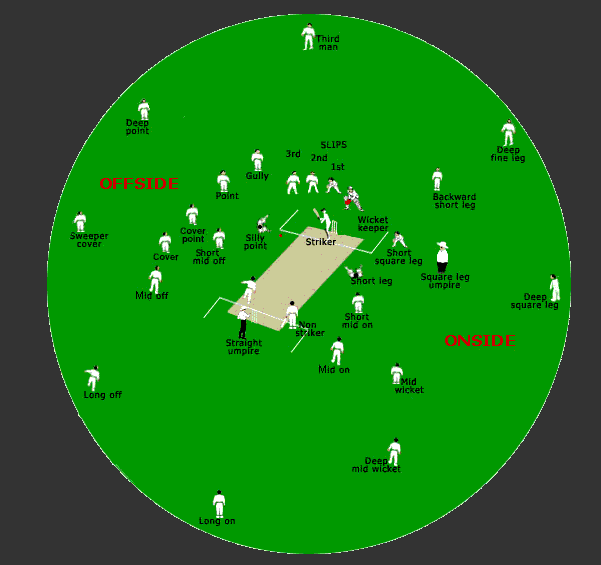

The teams that I have considered for this analysis are listed below. 

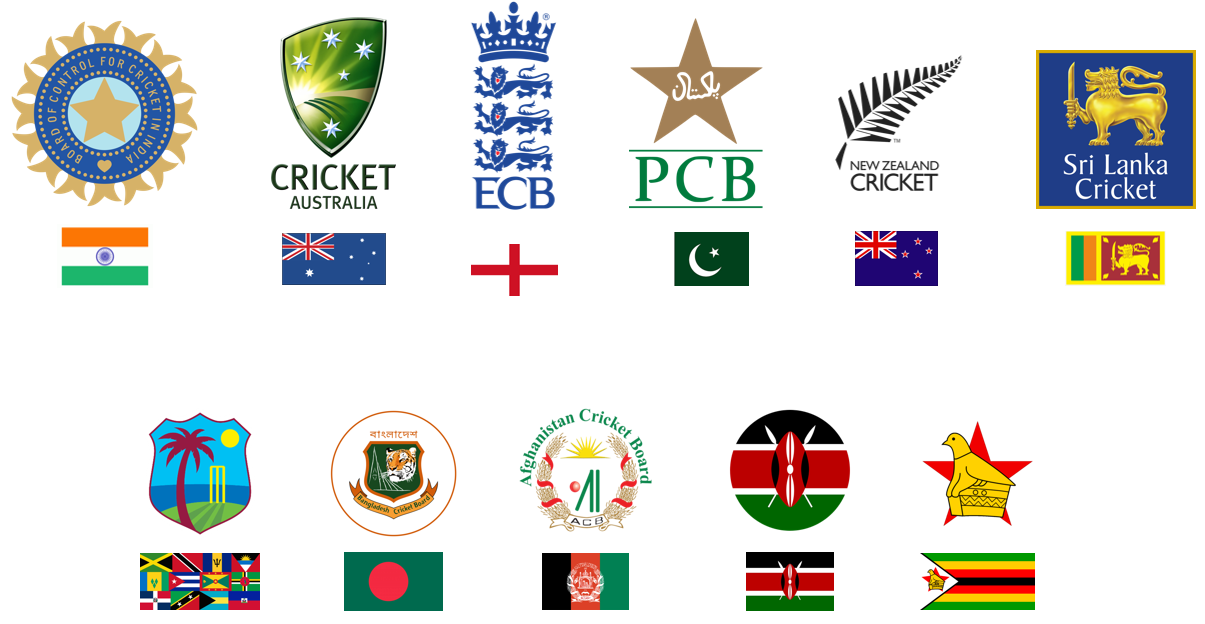

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

df = pd.read_csv("../input/capped-cricket-players/Capped cricket players.csv",  encoding= 'unicode_escape')
df

# Total capped players
Let's look at the total number of players capped in each team irrespective of the format, since the same player might have played for all 3 formats

In [ ]:
country_color = {'England': 'violet',
                 'India':'dodgerblue',
                 'Australia': 'gold',
                 'Pakistan':'limegreen',
                 'New Zealand':'black',
                 'W.Indies':'crimson',
                 'Sri Lanka':'darkblue',
                 'Zimbabwe':'red',
                 'S.Africa':'darkgreen',
                 'Bangladesh':'teal',
                 'Kenya':'darkgreen',
                 'Afghanistan':'green'}

In [ ]:
temp = df.groupby(['Country']).agg(Total_players=('Name', 'nunique')).reset_index()
temp['country_color'] = temp.Country.map(country_color)
# temp

plt.figure(figsize=(17.5, 7.5))
squarify.plot(sizes=temp["Total_players"], 
              value= temp["Total_players"], 
              label= temp["Country"], 
              alpha=0.5, 
              norm_x=100,
              norm_y=100,
              color = sns.color_palette(temp['country_color']),
              pad=False
             )
plt.axis('off')
plt.title("Total players in each country")

* It's very clear England has capped more players than any other country, it is expected outcome as cricket was invented by the English. 
* The lowest being Afghanistan as they are a young team and have been playing international cricket only from 2010. 
* We have not seen much of Kenya or Zimbabwe in action atleast in the last decade which also answers why they have less capped players.

# Total Players by Format
Now that we saw the overall players capped irrespective of the Format from the previous plot, Let's go one step deep and check for totals players capped in each country for each formats separately

In [ ]:
Australia_logo = requests.get("https://phenomenal.com.ng/wp-content/uploads/2019/10/australia_australian_aussie_national_country_flag-512.png")
India_logo = requests.get("https://upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/1200px-Flag_of_India.svg.png")
SAfrica_logo = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/1200px-Flag_of_South_Africa.svg.png")
SriLanka_logo = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/1280px-Flag_of_Sri_Lanka.svg.png")
Pakistan_logo = requests.get("https://www.gcpr.net/wp-content/uploads/2014/04/Pakistan-Flag.png")
Bangladesh_logo = requests.get("https://www.en.etemaaddaily.com/pages/health/coronavirusupdates/3708bangladeshcoro.png")
WIndies_logo = requests.get("https://upload.wikimedia.org/wikipedia/en/9/9b/Cricket_West_Indies_Logo_2017.png")
Zimbabwe_logo = requests.get("https://img1.hscicdn.com/image/upload/f_auto/lsci/db/PICTURES/CMS/313100/313131.logo.png")
Kenya_logo = requests.get("https://cdn.britannica.com/15/15-004-B5D6BF80/Flag-Kenya.jpg")
Afghanistan_logo = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/1200px-Flag_of_Afghanistan.svg.png")
NewZealand_logo = requests.get("https://cdn.britannica.com/17/3017-004-F42D7C4D/Flag-New-Zealand.jpg")
England_logo = requests.get("https://www.hampshireflag.co.uk/images/Flags/England-Flag.jpg")

# Image.open(BytesIO(r.content)).resize(20,20)

country_logo = {'Australia' : "https://phenomenal.com.ng/wp-content/uploads/2019/10/australia_australian_aussie_national_country_flag-512.png",
                'India' : "https://upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/1200px-Flag_of_India.svg.png",
                'S.Africa' : "https://cdn.britannica.com/27/4227-050-00DBD10A/Flag-South-Africa.jpg",
                'Sri Lanka' : "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/1280px-Flag_of_Sri_Lanka.svg.png",
                'Pakistan' : "https://www.gcpr.net/wp-content/uploads/2014/04/Pakistan-Flag.png",
                'Bangladesh' : "https://cdn.pixabay.com/photo/2012/04/10/23/00/bangladesh-26806_960_720.png",
                'W.Indies' : "https://upload.wikimedia.org/wikipedia/en/9/9b/Cricket_West_Indies_Logo_2017.png",
                'Zimbabwe' : "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Flag_of_Zimbabwe.svg/640px-Flag_of_Zimbabwe.svg.png",
                'Kenya' : "https://cdn.britannica.com/15/15-004-B5D6BF80/Flag-Kenya.jpg",
                'Afghanistan' : "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/1200px-Flag_of_Afghanistan.svg.png",
                'New Zealand': "https://cdn.britannica.com/17/3017-004-F42D7C4D/Flag-New-Zealand.jpg",
                'England': "https://www.hampshireflag.co.uk/images/Flags/England-Flag.jpg"
              }


In [ ]:
def offset_image(x, y, label, bar_is_too_short, ax):
    response = requests.get(country_logo[label])
    img = Image.open(BytesIO(response.content)).resize((70,45))
    im = OffsetImage(img, zoom=0.65)
    im.image.axes = ax
    x_offset = -25
    if bar_is_too_short:
        x = 0
    ab = AnnotationBbox(im, (x, y), xybox=(x_offset, 0), frameon=False,
                        xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)
    
    
        
def apply_label(h):
    for p in h.patches:
        print(p)
        print(p.get_width()+20, p.get_xy()[1]+0.30)
        h.text(p.get_width()+20, (p.get_xy()[1]+0.30), p.get_width(), color= 'black')



In [ ]:
def total_players_game_format(game_format):

    players_count = df.loc[df.Format==game_format].groupby(['Country']).agg(total_players=('Name', 'count')).reset_index().sort_values(['total_players'], ascending=False)
    players_count['color'] = players_count.Country.map(country_color)


    labels = players_count.Country
    values = players_count.total_players

    colors = ['violet', 'dodgerblue', 'gold', 'limegreen',  'black', 'crimson',
              'darkblue', 'red', 'darkgreen', 'teal', 'darkgreen', 'green']

    colors = players_count.color
    
    fig, ax = plt.subplots(figsize=(20, 10)) 
    
    height = 0.9
    g = ax.barh(y=labels, width=values, height=height, color=colors, 
                align='center', alpha=0.8)

    max_value = values.max()
    for i, (label, value) in enumerate(zip(labels, values)):
        offset_image(value, i, label, bar_is_too_short=value < max_value / 10, ax=plt.gca())
    plt.subplots_adjust(left=0.15)
    
    # apply_label(h=g)
    for p in g.patches:
        ax.text(p.get_width()+1, (p.get_xy()[1]+0.30), p.get_width(), color= 'black')

    
    plt.title(game_format)
    plt.show()
    
total_players_game_format(game_format='ODI')
total_players_game_format(game_format='Test')
total_players_game_format(game_format='T20')

Alright we saw which team is the oldest and which is the youngest, But would not it be nice to see when was the first player capped in each team? Let's check it out

# 1st player capped year in each format
Let's check out the year when the players were capped for the first time across each format. This would also mean when did the nation played their first match of the format

In [ ]:
# Players first game.

def players_first_game(game_format):
    temp = df.loc[df.Format==game_format, :].copy()
    players_first = temp.groupby(['Country']).agg(first_game=('First', 'min')).reset_index().sort_values(['first_game'], ascending=False)
    players_first['plot_size'] = np.arange(0,len(players_first))#[::-1]
    
    plt.figure(figsize=(17.5, 5))
    g = sns.scatterplot(players_first.Country, players_first.first_game, 
                        #size=players_first.plot_size, 
                        hue=players_first.first_game,
                        s=300)
    g.invert_yaxis()
    plt.title(game_format)
    
    
    for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()+1),
                    ha='center', va='bottom',
                    color= 'black')
    return None

players_first_game(game_format='ODI')
players_first_game(game_format='Test')
players_first_game(game_format='T20')

Well I did learn from the Test match plot that Autralia team is also as old as England having capped their first player in the 1800s. 

# Total players capped each year irrespective of teams

In [ ]:
def yearly_new_players(game_format):
    temp = df.loc[df.Format==game_format].copy()
    temp = temp.groupby(['First']).agg(new_players_count=('First', 'count')).reset_index()
    
    plt.figure(figsize=(22.5,5))
    sns.barplot(x=temp.First, y=temp.new_players_count, color='lightpink')
    plt.xticks(rotation=90)
    plt.xlabel('year')
    plt.title(game_format)
    
yearly_new_players(game_format='ODI')
yearly_new_players(game_format='Test')
yearly_new_players(game_format='T20')

At least in the last few decades the number of players capped are around 50 - 70 in all 3 formats

# Proportions of players in each format

In [ ]:
def offset_image(x, y, label, ax):
    response = requests.get(country_logo[label])
    img = Image.open(BytesIO(response.content)).resize((70,45))
    im = OffsetImage(img, zoom=0.65)
    im.image.axes = ax
    x_offset = -25

    ab = AnnotationBbox(im, (x, y), xybox=(x_offset, 0), frameon=False,
                        xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)

    
temp = df.groupby(['Country', 'Format']).agg(players_count=('Format', 'count')).reset_index()

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

# First Ring (outside)
fig, axes = plt.subplots(4,3, figsize=(20,15))
axes = axes.flatten()

for i, country in enumerate(temp.Country.unique()):
    axes[i].axis('equal')
    plot_temp = temp.loc[temp.Country==country, :].copy()
    plot_temp['per'] = np.round(plot_temp.players_count/plot_temp.players_count.sum(),2)
    plot_temp['label'] = plot_temp.players_count.astype('str') + " (" + plot_temp['per'].astype('str') +"%)"

    g, _ = axes[i].pie(x=plot_temp.players_count, 
                       radius=1, 
                       labels=  plot_temp['label'], #plot_temp.players_count,
                          )
    
    plt.setp(g, width=0.3, edgecolor='white')
    axes[i].set_title(country)
    axes[i].legend()
    axes[i].legend(labels=['ODI', 'T20', 'Test'])
    

    offset_image(x=0.35, y=0, label=country, ax=axes[i])
    

Well I was expecting to see almost all countries to be having more capped Test players since it is the oldest format, but few things to note here. 
* Bangladesh, SriLanka and Zimbabwe has more capped ODI players.
* Kenya has no players from the Test format since the country has not played any test matches. 
* Other than the 4 countries all of them have more capped test played.
* One common thing between all of the teams is they all have less T20 capped players since it's the newest format compared to ODI and Test.

# Players capped by year

In [ ]:
temp = df.Country.value_counts()
country_order = list(temp.index)

sns.catplot(x='Country', y='First', data=df, jitter='0.4', #color='grey',
            hue='Format', order= country_order,
            height=6, aspect=2)

Well there are 2 things we all can see from this.
* There is a gap in between 1913-1920 as well as between 1939-1946. Probabaly no cricket was played during these period. 
* In addition to the above period South Africa seemed to have a break between 1970-1991. 

# Overall capped players across years from each Country

In [ ]:
f, (ax_dist_Australia, ax_dist_India, ax_dist_SAfrica, 
    ax_dist_SriLanka, ax_dist_Pakistan, ax_dist_Bangladesh, 
    ax_dist_WIndies, ax_dist_Zimbabwe, ax_dist_Kenya, 
    ax_dist_Afghanistan, ax_dist_NewZealand, ax_dist_England) = plt.subplots(12, sharex=True, gridspec_kw={"height_ratios": (8.33, 8.33, 8.33,
                                                                                                                              8.33, 8.33, 8.33,
                                                                                                                              8.33, 8.33, 8.33,
                                                                                                                              8.33, 8.33, 8.33)}, figsize=(25, 25))
 
# Add a graph in each part
sns.distplot(df.First[df.Country=='Australia'] , color=country_color['Australia'], 
             ax=ax_dist_Australia, hist=False, kde_kws = {'shade': True}, label='Australia')
ax_dist_Australia.set(xlabel="")
ax_dist_Australia.set_xlabel("")
ax_dist_Australia.legend()


sns.distplot(df.First[df.Country=='India'] , color=country_color['India'], #'#225ea8', 
             ax=ax_dist_India, hist=False, kde_kws = {'shade': True}, label='India')
ax_dist_India.set(xlabel="")
ax_dist_India.set_xlabel("")
ax_dist_India.legend()

sns.distplot(df.First[df.Country=='S.Africa'] , color=country_color['S.Africa'], #'green', 
             ax=ax_dist_SAfrica, hist=False, kde_kws = {'shade': True}, label='S.Africa')
ax_dist_SAfrica.set(xlabel="")
ax_dist_SAfrica.set_xlabel("")
ax_dist_SAfrica.legend()

sns.distplot(df.First[df.Country=='Sri Lanka'] , color=country_color['Sri Lanka'], #'blue', 
             ax=ax_dist_SriLanka, hist=False, kde_kws = {'shade': True}, label='Sri Lanka')
ax_dist_SriLanka.set(xlabel="")
ax_dist_SriLanka.set_xlabel("")
ax_dist_SriLanka.legend()

sns.distplot(df.First[df.Country=='Pakistan'] , color=country_color['Pakistan'], #'#00441b', 
             ax=ax_dist_Pakistan, hist=False, kde_kws = {'shade': True}, label='Pakistan')
ax_dist_Pakistan.set(xlabel="")
ax_dist_Pakistan.set_xlabel("")
ax_dist_Pakistan.legend()

sns.distplot(df.First[df.Country=='Bangladesh'] , color=country_color['Bangladesh'], #'green', 
             ax=ax_dist_Bangladesh, hist=False, kde_kws = {'shade': True}, label='Bangladesh')
ax_dist_Bangladesh.set(xlabel="")
ax_dist_Bangladesh.set_xlabel("")
ax_dist_Bangladesh.legend()

sns.distplot(df.First[df.Country=='W.Indies'] , color=country_color['W.Indies'], #'red', 
             ax=ax_dist_WIndies, hist=False, kde_kws = {'shade': True}, label='W.Indies')
ax_dist_WIndies.set(xlabel="")
ax_dist_WIndies.set_xlabel("")
ax_dist_WIndies.legend()

sns.distplot(df.First[df.Country=='Zimbabwe'] , color=country_color['Zimbabwe'], #'pink', 
             ax=ax_dist_Zimbabwe, hist=False, kde_kws = {'shade': True}, label='Zimbabwe')
ax_dist_Zimbabwe.set(xlabel="")
ax_dist_Zimbabwe.set_xlabel("")
ax_dist_Zimbabwe.legend()

sns.distplot(df.First[df.Country=='Kenya'] , color=country_color['Kenya'], #'red', 
             ax=ax_dist_Kenya, hist=False, kde_kws = {'shade': True}, label='Kenya')
ax_dist_Kenya.set(xlabel="")
ax_dist_Kenya.set_xlabel("")
ax_dist_Kenya.legend()

sns.distplot(df.First[df.Country=='Afghanistan'] , color=country_color['Afghanistan'], #'#00441b', 
             ax=ax_dist_Afghanistan, hist=False, kde_kws = {'shade': True}, label='Afghanistan')
ax_dist_Afghanistan.set(xlabel="")
ax_dist_Afghanistan.set_xlabel("")
ax_dist_Afghanistan.legend()

sns.distplot(df.First[df.Country=='New Zealand'] , color=country_color['New Zealand'], #'black', 
             ax=ax_dist_NewZealand, hist=False, kde_kws = {'shade': True}, label='New Zealand')
ax_dist_NewZealand.set(xlabel="")
ax_dist_NewZealand.set_xlabel("")
ax_dist_NewZealand.legend()

sns.distplot(df.First[df.Country=='England'] , color=country_color['England'], #'#0000A0', 
             ax=ax_dist_England, hist=False, kde_kws = {'shade': True}, label='England')
ax_dist_England.set(xlabel="")
ax_dist_England.set_xlabel("")
ax_dist_England.legend()

ax_dist_Australia.set(title="Players capped")

# for p, label in zip(ax.patches, DF["weekday"].value_counts().index):
#     ax.annotate(p.get_height(), (p.get_x()+0.375, 0.7), color='white')

# Players who have played all the 3 formats
For fun let's check for players who have played all 3 formats of the game.

In [ ]:
temp = df.groupby(['Name', 'Country']).agg(Formats_played = ('Name', 'count')).reset_index().sort_values(['Formats_played'], ascending=False)

temp_2 = temp.groupby(['Formats_played']).agg(Formats_played_count = ('Formats_played', 'count')).reset_index()
temp_2['label'] = temp_2.Formats_played.astype('str') + " Formats " + "\n" + \
                     ''+ temp_2.Formats_played_count.astype('str') + ", (" +\
                    (np.round(temp_2['Formats_played_count']/temp_2['Formats_played_count'].sum() *100,2)).astype('str') + ' %)'

In [ ]:
plt.figure(figsize=(10,5))
squarify.plot(sizes=temp_2["Formats_played_count"], 
#               value= temp_2["Formats_played_count"], 
              label= temp_2["label"], 
              alpha=0.9, 
              norm_x=100,
              norm_y=100,
              pad=True
              #, color=colors
             )
plt.axis('off')
plt.title("Players ")

Well there is definitely something strange we could see here. How a player could play in 4 or 5 formats. mostly likely it should be players with the same name from the same team. Let's check them out who are the players who have played more than 3 formats.

In [ ]:
temp.loc[temp.Formats_played>3, ['Name', 'Country']]

Alright now let's check if these were players who played at different time period with the same name. My assumption is they might have played during different periods

In [ ]:
selected_players = temp.loc[temp.Formats_played>3][['Name', 'Country']].apply(tuple, axis=1)
df[df[['Name', 'Country']].apply(tuple, axis=1).isin(selected_players)]

This confirms that our assumption is right. 

# Player's career span 

Let's check out how long have the players played cricket during their career. 
Let's consider only players who played their first game before 2015 and assume that they have not retired yet by labelling their last game as 2020. For all the players who have been capped before 2005 were their last game information is not available let's fill them as 2020. 

In [ ]:
condition_1 = ((df.Last.isnull())&(df.First<2005))
condition_2 = ((df.Last.isnull())&(df.First>2005))
df['new_Last'] = np.where(condition_1, df.First,
                          np.where(condition_2, 2020, df.Last))
df['career_duration'] = df.new_Last-df.First

temp = df.loc[df.First<=2015, :].copy()
# temp.Last = temp.Last.fillna(2020)

temp = temp[['Format', 'Country', 'Name', 'First', 'Last', 'new_Last', 'career_duration']]
temp

In [ ]:
f, (Test, ODI,  T20) = plt.subplots(1, 3, #sharey=True, 
                                   gridspec_kw={"width_ratios": (33.33, 33.33, 33.33)},
                                   figsize=(25, 10))

temp_v2 = temp.loc[temp.Format=='Test'].copy()
sns.boxplot(y=temp_v2.Country, x=temp_v2.career_duration, ax = Test)
Test.set(title="Test")

temp_v2 = temp.loc[temp.Format=='ODI'].copy()
sns.boxplot(y=temp_v2.Country, x=temp_v2.career_duration, ax = ODI)
ODI.set(title="ODI")
ODI.set(ylabel="")

temp_v2 = temp.loc[temp.Format=='T20'].copy()
sns.boxplot(y=temp_v2.Country, x=temp_v2.career_duration, ax = T20)
T20.set(title="T20")
T20.set(ylabel="")

One noticible thing that standout from the plot is the outliers of the test format from England players. It's quite surprising to see some one to have played for more than 25 years. Let's check out all the players who have played for more than 20 years.

# Players who have played for more than 20 years 

In [ ]:
df.loc[df.career_duration>=20, ['Format', 'Cap', 'Country', 'Name', 
                                'First', 'Last', 'career_duration']].sort_values(['career_duration', 
                                                                                  'Country'], ascending=False)


temp = df.loc[df.career_duration>=20, ['Country', 'Name', 'career_duration']].groupby(['Country', 'Name']).agg(career_duration = ('career_duration', 'max')).reset_index()
temp = temp.sort_values(['career_duration'], ascending=False)

temp['Country_color'] = temp.Country.map(country_color)
temp['label_text'] = temp.Name.astype('str') + ", " + temp.Country.astype('str') + ", " + temp.career_duration.astype('int').astype('str') + " years" 


old_players_image = {'Bob Simpson' :'https://st3.cricketcountry.com/wp-content/uploads/cricket/20170202075716.jpeg',
                     'Brian Close':'https://i.pinimg.com/originals/b3/02/ea/b302ea1e206d6f47babde77996f7c8e5.jpg',
                     'Freddie Brown':'https://upload.wikimedia.org/wikipedia/commons/1/15/Freddie_Brown_cricketer_c1935.jpg',
                     'Don Bradman': 'https://st2.cricketcountry.com/wp-content/uploads/cricket/dccc1faaaff45acff6b49a572d7cd656.jpeg',
                     'Syd Gregory' : 'https://www.famousbirthdays.com/faces/gregory-syd-image.jpg',
                     'Colin Cowdrey': 'https://st3.cricketcountry.com/wp-content/uploads/cricket/20150630031249.jpeg',
                     'Denis Compton':'https://pbs.twimg.com/media/DAf86RFWAAE6Zi7.jpg',
                     'Frank Woolley':'https://qt.azureedge.net/resources/authors-images-large/frank-woolley.jpg',
                     'Fred Titmus':'https://www.watfordobserver.co.uk/resources/images/1604204.jpg?display=1&htype=100001&type=responsive-gallery',
                     'George Gunn':'https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/George_Gunn_c1910cr.jpg/260px-George_Gunn_c1910cr.jpg',
                     'Graham Gooch':'https://www.arenaentertainments.co.uk/wp-content/uploads/2013/09/Graham-Gooch-1-298x312.jpg',
                     'Jack Hobbs':'https://upload.wikimedia.org/wikipedia/commons/7/7f/Jack_Hobbs_c1920.jpg',
                     'Wally Hammond':'https://upload.wikimedia.org/wikipedia/commons/1/14/Wally_Hammond_c1930.jpg',
                     'Wilfred Rhodes':'https://st3.cricketcountry.com/wp-content/uploads/cricket/20150625044847.jpeg',
                     'Sachin Tendulkar':'https://www.celebritynews.wiki/wp-content/uploads/2019/05/Sachin-Tendulkar.jpg',
                     'Imran Khan':'https://3.bp.blogspot.com/-PyM7Tx_Uz-c/WAahDOXuqtI/AAAAAAAADiM/rJrQpj3cQ68MvduDFpSYqCA-oNpwUDkgACK4B/s400/Imran-Khan.jpg',
                     'Javed Miandad':'https://t2.gstatic.com/images?q=tbn:ANd9GcT_82bHwcvuiCLu2FG300jp97EeoYl_VzEB5tbrxxxdtFDRUtspNaOuUf59Kjx7',
                     'Mushtaq Mohammad':'https://p.imgci.com/db/PICTURES/CMS/21100/21173.jpg',
                     'Shoaib Malik':'https://www.cricketcountry.com/wp-content/uploads/2014/02/Shoaib-Malik-poses-during-the-ICC-Champions-photocall-session-of-Pakistan-at-Sand-1.jpg',
                     'Bruce Mitchell':'https://www.cricketcountry.com/wp-content/uploads/2014/01/Bruce-Mitchell.jpg',
                     'Dave Nourse':'https://upload.wikimedia.org/wikipedia/commons/1/13/Dudley_Nourse_1935.jpg',
                     'Herbie Taylor':'https://st3.cricketcountry.com/wp-content/uploads/cricket/20170505094914.jpeg',
                     'Sanath Jayasuriya':'https://www.geocities.ws/saqibali/31.jpg',
                     'Chris Gayle':'https://st3.cricketcountry.com/wp-content/uploads/cricket/20140522042341.jpeg',
                     'Garfield Sobers':'https://imgresizer.eurosport.com/unsafe/1200x0/filters:format(jpeg)/origin-imgresizer.eurosport.com/2015/10/22/1716752-36333424-2560-1440.jpg',
                     'George Headley':'https://st3.cricketcountry.com//wp-content/uploads/2014/10/George-Headly300446-201x300.jpg',
                     'Shivnarine Chanderpaul':'https://m.cricbuzz.com/a/img/v1/192x192/i1/c157222/shivnarine-chanderpaul.jpg'}

In [ ]:
def image_circle_crop(img):
    npImage=np.array(img)

    h,w=img.size

    # Create same size alpha layer with circle
    alpha = Image.new('L', img.size,0)
    draw = ImageDraw.Draw(alpha)
    draw.pieslice([0,0,h,w],0,360,fill=255)

    # Convert alpha Image to numpy array
    npAlpha=np.array(alpha)

    # Add alpha layer to RGB
    npImage=np.dstack((npImage,npAlpha))
    
    return npImage

def offset_image(x, y, label, ax):
    response = requests.get(old_players_image[label])
    img = Image.open(BytesIO(response.content)).resize((80,60))
    
    img = image_circle_crop(img)
    
    im = OffsetImage(img, zoom=0.65)
    im.image.axes = ax
    x_offset = -25

    ab = AnnotationBbox(im, (x+2, y), xybox=(x_offset, 0), frameon=False,
                        xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)

    
def change_width(ax, new_value) :
    for patch in ax.patches :
        #print(patch)
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(0.03)

        #print(patch)
        
        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .50)


def apply_label(x, y, label, ax):
    ax.text(x, y+0.05,label, color= 'black', size=12.5)

plt.figure(figsize=(15, 25))

g = plt.barh(temp.Name, temp.career_duration, color= temp.Country_color.tolist()
            )

plt.xlim(0, temp.career_duration.max()+5)

change_width(ax=g, new_value=0.05)
# apply_label(ax=g)


labels = temp.Name
values = temp.career_duration
label_text = temp.label_text
    
for i, (label, value) in enumerate(zip(labels, values)):
    offset_image(value, i, label, ax=plt.gca())

for i, (value, label_text) in enumerate(zip(values, label_text)):
    apply_label(x=2, y=i, label=label_text, ax=plt.gca())

# plt.subplots_adjust(left=0.15)

plt.xlabel("Years")
plt.yticks([])
# g.set_ylabel("")
# g.set_yticks([])
# plt.title(game_format)
plt.show()



# That brings to the end of my kernel. I enjoyed working this data and hope you liked it too. Please upvote the kernel if you like it. Thanks